In [ ]:
#Ref: https://janakiev.com/notebooks/keras-iris/

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [6]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features)

4


/Users/sherry/anaconda/envs/emo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
print(n_features, n_classes)

4 3


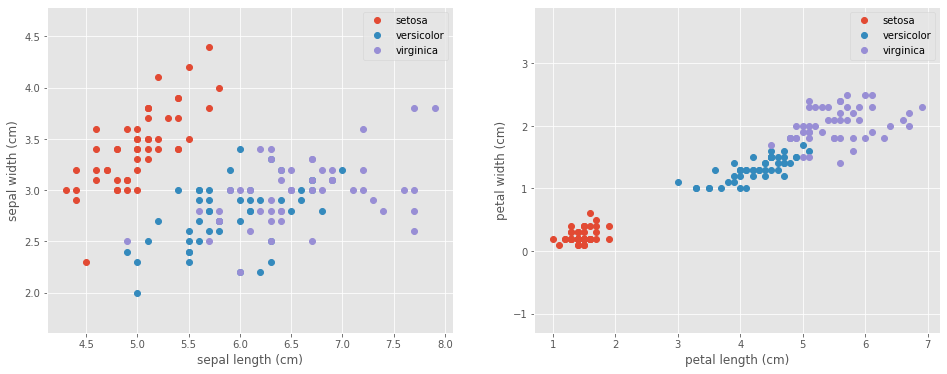

In [8]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [24]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='mean_squared_error', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________

In [34]:
from keras.callbacks import TensorBoard
import time
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    c_time = time.time()
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Time difference:', time.time()-c_time)
    #history_dict[model.name] = [history_callback, model]
    history_dict[model.name] = history_callback

Model name: model_1
Test loss: 0.08664782216151555
Test accuracy: 0.8666666666666667
Time difference: 6.208511114120483
Model name: model_2
Test loss: 0.11097748140494029
Test accuracy: 0.8933333373069763
Time difference: 6.3737781047821045
Model name: model_3
Test loss: 0.11577070236206055
Test accuracy: 0.8133333317438761
Time difference: 8.044958114624023


In [36]:
history_dict

{'model_1': <keras.callbacks.History at 0x1a4ddb0710>,
 'model_2': <keras.callbacks.History at 0x1a4de2db50>,
 'model_3': <keras.callbacks.History at 0x1a4e292410>}

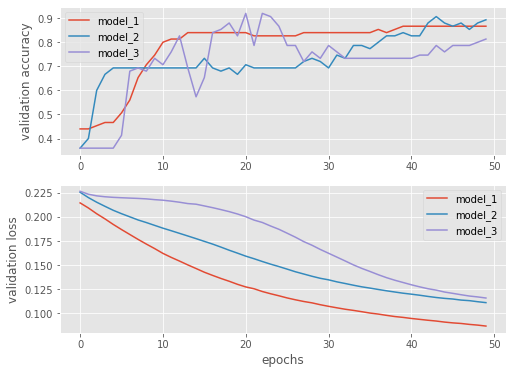

In [37]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name].history['val_acc']
    val_loss = history_dict[model_name].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [52]:
from keras.models import Sequential
from keras.layers import Dense
history = {}
model = Sequential(name = "ff")
model.add(Dense(9, input_dim = n_features, activation = 'sigmoid'))
model.add(Dense(10, input_dim = n_features, activation = 'sigmoid'))
model.add(Dense(n_classes, activation = "softmax"))
model.compile(loss='mean_squared_error', 
                      optimizer='adam', 
                      metrics=['accuracy'])
model.summary()
history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
score = model.evaluate(X_test, Y_test, verbose=0)
history['model'] = history_callback
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 9)                 45        
_________________________________________________________________
dense_110 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_111 (Dense)            (None, 3)                 33        
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.10593498508135478
Test accuracy: 0.8933333333333333


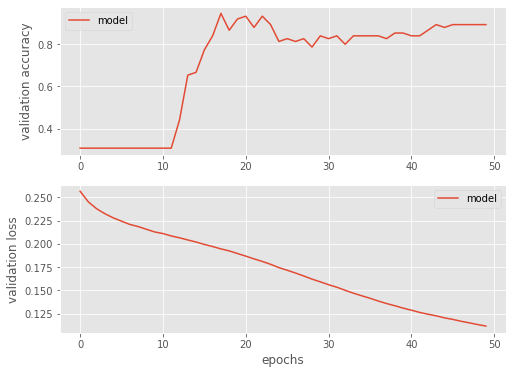

In [51]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history:
    val_acc = history[model_name].history['val_acc']
    val_loss = history[model_name].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()